# Exemplo de Regressão Linear

Este exemplo usa apenas o primeiro recurso do conjunto de dados de diabetes, 
para ilustrar um gráfico bidimensional dessa técnica de regressão. 
regressão. A linha reta pode ser vista no gráfico, mostrando como a 
regressão linear tenta desenhar uma linha reta que melhor minimize 
minimize a soma residual de quadrados entre as respostas observadas 
observadas no conjunto de dados e as respostas previstas pela aproximação linear.

Os coeficientes, a soma residual de quadrados e a pontuação de variância são 
também são calculados.

----

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
diabetes = datasets.load_diabetes()

In [3]:
diabetes_X = diabetes.data[:, np.newaxis, 2] # Usa somente 1 feature

In [4]:
# Divide em treino e teste
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]


In [5]:
# Criar Modelo
regr = linear_model.ElasticNet(l1_ratio=0)

In [6]:
# Treina Modelo
regr.fit(diabetes_X_train,
         diabetes_y_train)

/home/glyph-vasts/D/Utilidades/Virtual_Envs/Python/data_science_studies/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.254e+06, tolerance: 2.510e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


ElasticNet(l1_ratio=0)

In [7]:
# Predições de Teste
diabetes_y_pred = regr.predict(diabetes_X_test)

In [8]:
# Coeficientes de Regressão
print('Coeficientes: \n', regr.coef_)
# Resíduo
print("MSE: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Métrica de Avaliação
print('R2: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Coeficientes: 
 [2.11998265]
MSE: 5557.73
R2: -0.15


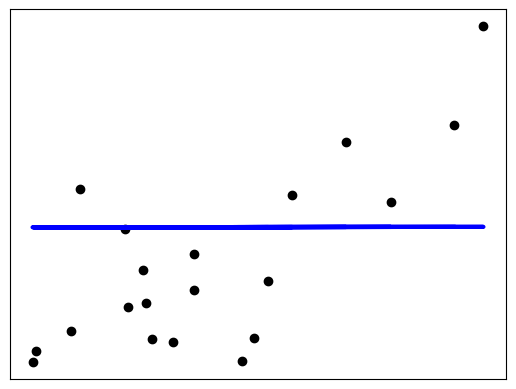

In [9]:
# Gráficos
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()